# Number of indexed/deindexed/active journals in the SciELO network

This analysis shows the
annual evolution of the number of indexed, deindexed and active journals
of each collection,
and of the whole network.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

## Loading the dataset

We're going to use the network `journals.csv` for that.

In [3]:
journals = pd.read_csv("tabs_network/journals.csv")

The following ISSN cleaning/normalization step
is fully documented in a normalization-specific notebook
that can be found together with this one
in the same repository.

In [4]:
issn_scielo_fix = {"0001-6002": "0001-6012",
                   "0258-6444": "2215-3535",
                   "0325-8203": "1668-7027",
                   "0719-448x": "0719-448X",
                   "0797-9789": "1688-499X",
                   "0807-8967": "0870-8967",
                   "0858-6444": "0258-6444",
                   "1315-5216": "1316-5216",
                   "1667-8682": "1667-8982",
                   "1678-5177": "0103-6564",
                   "1683-0789": "1683-0768",
                   "1688-4094": "1688-4221",
                   "1852-4418": "1852-4184",
                   "1980-5438": "0103-5665",
                   "2175-3598": "0104-1282",
                   "2233-7666": "2223-7666",
                   "2237-101X": "1518-3319",
                   "24516600": "2451-6600",
                   "2993-6797": "2393-6797"}
journals["ISSN SciELO"].replace(issn_scielo_fix, inplace=True)

We don't need all the columns from the `journals.csv`.

In [5]:
journals.columns

Index(['extraction date', 'study unit', 'collection', 'ISSN SciELO', 'ISSN's',
       'title at SciELO', 'title thematic areas',
       'title is agricultural sciences', 'title is applied social sciences',
       'title is biological sciences', 'title is engineering',
       'title is exact and earth sciences', 'title is health sciences',
       'title is human sciences', 'title is linguistics, letters and arts',
       'title is multidisciplinary', 'title current status',
       'title + subtitle SciELO', 'short title SciELO', 'short title ISO',
       'title PubMed', 'publisher name', 'use license', 'alpha frequency',
       'numeric frequency (in months)', 'inclusion year at SciELO',
       'stopping year at SciELO', 'stopping reason',
       'date of the first document', 'volume of the first document',
       'issue of the first document', 'date of the last document',
       'volume of the last document', 'issue of the last document',
       'total of issues', 'issues at 2018', 'is

These are the columns we need:

In [6]:
columns = ["collection", "ISSN SciELO",
           "inclusion year at SciELO", "stopping year at SciELO"]
journals[columns].head()

,collection,ISSN SciELO,inclusion year at SciELO,stopping year at SciELO
0,scl,1676-5648,2006,2010.0
1,scl,0101-8108,2004,2012.0
2,scl,0034-7701,2000,2008.0
3,scl,0102-261X,1999,2012.0
4,scl,1516-9332,2005,2009.0


In [7]:
journals[columns].shape

(1732, 4)

## Collections

Are there any inactive collection in the analytics?

In [8]:
url = "http://articlemeta.scielo.org/api/v1/collection/identifiers/"
collections_info = pd.read_json(url)
collections_info[collections_info["has_analytics"] &
                 ~collections_info["is_active"]].code

9    sss
Name: code, dtype: object

Yes! The `sss` (Social Sciences) collection is discontinued.
The easiest way to collect information from this dataset
is by removing its entries,
but in order to get the full network information
and the information about this collection,
we shouldn't do that.

How can we classify these collections?

In [9]:
collections_info[collections_info["has_analytics"]] \
    .groupby("status").aggregate({"code": set})

,code
status,
certified,"{sss, mex, per, arg, cri, sza, prt, esp, cub, ..."
development,"{pry, ecu}"
independent,"{rvt, psi, rve}"


The `independent` collections follow the SciELO model,
but they aren't managed by SciELO.

We have $5$ collections in analytics that are *thematic*:

In [10]:
acolinfo = collections_info[collections_info["has_analytics"]] \
                           [["code", "document_count", "domain",
                             "original_name", "status", "is_active"]] \
                           .set_index("code")
acolinfo.loc[["psi", "rve", "rvt", "spa", "sss"]]

,document_count,domain,original_name,status,is_active
code,,,,,
psi,23841.0,pepsic.bvsalud.org,PEPSIC,independent,True
rve,22733.0,www.revenf.bvs.br,REVENF,independent,True
rvt,136.0,www.revtur.org,RevTur,independent,True
spa,40996.0,www.scielosp.org,Saúde Pública,certified,True
sss,665.0,socialsciences.scielo.org,Social Sciences,certified,False


And $10$ collections that are *national*:

In [11]:
acolinfo.drop(["psi", "rve", "rvt", "spa", "sss"])

,document_count,domain,original_name,status,is_active
code,,,,,
arg,36555.0,www.scielo.org.ar,Argentina,certified,True
chl,61760.0,www.scielo.cl,Chile,certified,True
col,66973.0,www.scielo.org.co,Colombia,certified,True
cub,33492.0,scielo.sld.cu,Cuba,certified,True
esp,37200.0,scielo.isciii.es,España,certified,True
mex,56905.0,www.scielo.org.mx,Mexico,certified,True
prt,17127.0,www.scielo.mec.pt,Portugal,certified,True
scl,370150.0,www.scielo.br,Brasil,certified,True
sza,25617.0,www.scielo.org.za,South Africa,certified,True


## Data de-duplication & `inf` instead of `NaN`

Each ISSN may appear in more than one collection
and perhaps more than once in a collection,
as the `ISSN SciELO` column is normalized, not the rows.
As an example of that:

In [12]:
journals[columns][journals["ISSN SciELO"].isin(["0103-5665", "0104-1282"])]

,collection,ISSN SciELO,inclusion year at SciELO,stopping year at SciELO
60,scl,0103-5665,2006,2015.0
1442,psi,0103-5665,2015,2015.0
1455,psi,0104-1282,2012,NaN
1461,psi,0103-5665,2008,NaN
1492,psi,0104-1282,2008,NaN


These rows are inconsistent,
as the inclusion year is different for the same ISSN.
At least, these are the only inconsistent entries in the dataset:

In [13]:
is_consistent = (
    journals[columns]
        .groupby(["collection", "ISSN SciELO"])
        .apply(lambda df: df.apply(set).apply(len).sum() == df.size)
        .rename("is_consistent")
)
pd.DataFrame(is_consistent[~is_consistent])

is_consistent
collection ISSN SciELO               
psi        0103-5665            False
           0104-1282            False

Then let's get the consistent dataset
while keeping the index in "sync" with the full journals dataframe.
We'll replace the `NaN` by `inf` (infinity) in the stopping year column
in order to make it the greates possible value
(which will also be required later on).

In [14]:
dataset = (journals
    .reset_index()
    .fillna({"stopping year at SciELO": np.inf})
    .groupby(["collection", "ISSN SciELO"])
    .aggregate({
        "inclusion year at SciELO": "min",
        "stopping year at SciELO": "max",
        "index": "max",
    })
    .reset_index()
    .set_index("index")
)
dataset.iloc[::312]

,collection,ISSN SciELO,inclusion year at SciELO,stopping year at SciELO
index,,,,
373,arg,0002-7014,2003,2014.000000
725,col,0120-3592,2006,inf
1006,esp,0211-5735,2007,inf
1284,prt,0873-2159,2006,2012.000000
277,scl,0102-6909,1998,inf
1571,sss,1414-3283,2006,inf


The previous cell has a quite generic code that should work on any input.
But in our case, it could be simpler,
since only two rows had been removed (as expected):

In [15]:
dataset.shape

(1730, 4)

The duplicated entries were fixed:

In [16]:
dataset[dataset["ISSN SciELO"].isin(["0103-5665", "0104-1282"])]

,collection,ISSN SciELO,inclusion year at SciELO,stopping year at SciELO
index,,,,
1461,psi,0103-5665,2008,inf
1492,psi,0104-1282,2008,inf
60,scl,0103-5665,2006,2015.000000


A simpler (but not recommended) approach
would be the removal of the two duplicated rows:
$1442$ and $1455$, in the 2018-09-14 package version.
($1436$ and $1449$ in the 2018-06-10 package version).

In [17]:
journals.drop([1442, 1455]).shape

(1730, 98)

Is it really the same?

In [18]:
journals.drop([1442, 1455])[columns].fillna(np.inf).eq(dataset).all()

collection                  True
ISSN SciELO                 True
inclusion year at SciELO    True
stopping year at SciELO     True
dtype: bool

## Number of active journals in the network

How many active journals does the network have?

In [19]:
dataset[dataset["stopping year at SciELO"] == np.inf]["ISSN SciELO"] \
    .drop_duplicates().count()

1360

Actually, that number isn't *clean*,
since a journal can't be said *active*
just because it's was never deindexed
in a now discontinued collection.

### Social Sciences (`sss`) collection normalization

There are $10$ journals from the `sss` collection
that could be regarded as deindexed
from the year when `sss` was discontinued.

In [20]:
dataset[(dataset["stopping year at SciELO"] == np.inf) &
        (dataset["collection"] != "sss")]["ISSN SciELO"] \
    .drop_duplicates().count()

1350

That's another kind of normalization step:
enforcing that the `sss` collection had all its entries
deindexed in $2010$.

In [21]:
sss_discontinuation_year = 2010
sss_selector = dataset[dataset["collection"] == "sss"].index
# The "max" step is just for consistency
# regarding an extraordinary entry included in 2017
dataset.loc[sss_selector, "stopping year at SciELO"] = \
    dataset[dataset["collection"] == "sss"].T.apply(
        lambda row: max(min(sss_discontinuation_year,
                            row["stopping year at SciELO"]),
                        row["inclusion year at SciELO"])
    )

### Yearly totals

How many journals had been active in the past years?
In order to answer this question,
we'll need to count how many journals
had been indexed and deindexed on each year,
grouping them to de-duplicate
when any journal appears in more than one collection.

In [22]:
network_years = dataset.groupby(["ISSN SciELO"]).aggregate({
    "inclusion year at SciELO": "min",
    "stopping year at SciELO": "max",
})
network_years.head()

,inclusion year at SciELO,stopping year at SciELO
ISSN SciELO,,
0001-3714,1999,2000.000000
0001-3765,2000,inf
0001-6012,2002,inf
0001-6365,2001,2012.000000
0002-0591,2013,2015.000000


In [23]:
network_index = pd.DataFrame({
    "indexed": network_years.groupby("inclusion year at SciELO").size(),
    "deindexed": network_years.groupby("stopping year at SciELO").size(),
}).fillna(0) \
  .assign(total=lambda df: (df["indexed"] - df["deindexed"]).cumsum()) \
  .drop(np.inf)
network_index

,indexed,deindexed,total
1997.0,9.0,1.0,8.0
1998.0,29.0,0.0,37.0
1999.0,15.0,1.0,51.0
2000.0,28.0,3.0,76.0
2001.0,26.0,2.0,100.0
2002.0,67.0,5.0,162.0
2003.0,43.0,3.0,202.0
2004.0,57.0,5.0,254.0
2005.0,83.0,10.0,327.0
2006.0,132.0,6.0,453.0


The totals are the difference of the cumulative sum
of the indexed/deindexed columns.
Numbers might be difficult to understand,
let's plot this data.

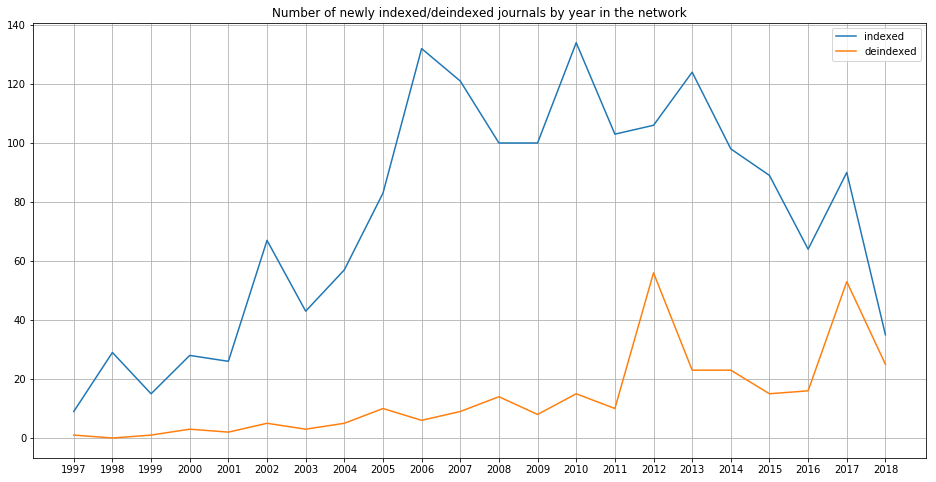

In [24]:
network_index[["indexed", "deindexed"]].plot(
    figsize=(16, 8),
    title="Number of newly indexed/deindexed journals by year in the network",
    xticks=network_index.index,
    grid=True,
);

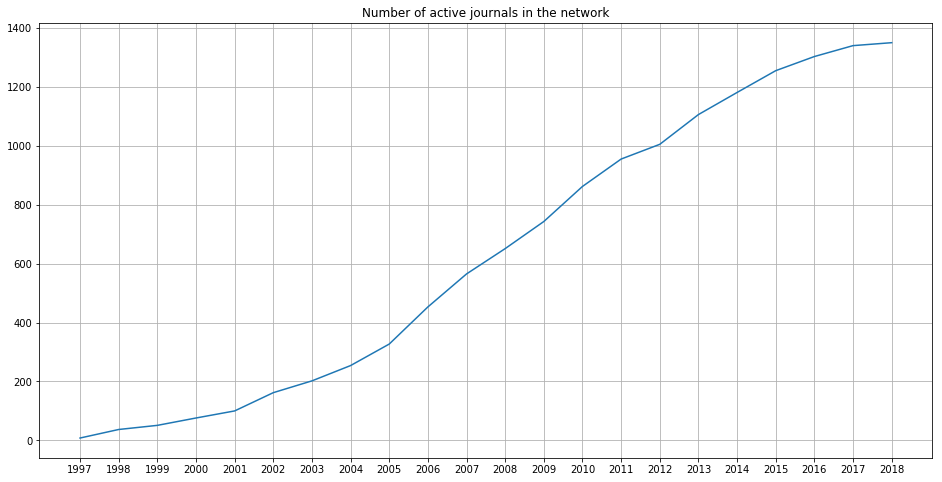

In [25]:
network_index["total"].plot(
    figsize=(16, 8),
    title="Number of active journals in the network",
    xticks=network_index.index,
    grid=True,
);

## Why are the journals deindexed?

There are $3$ possible reasons for that:

- Suspended, a journal that hadn't been satisfying
  some quality/requirement criteria
  (e.g. data access is no longer open, had one year delay)
- Deceased, a journal that stopped publishing at all
- Renamed, it became another journal entry
  (the old entry is regarded as deceased)

Can we find this information in this dataset?

There are two columns/fields that might help here:

In [26]:
journals["title current status"].unique()

array(['deceased', 'suspended', 'current', 'inprogress'], dtype=object)

In [27]:
journals["stopping reason"].unique()

array([nan, 'susp', 'not-'], dtype=object)

These mean:

- `NaN`: Not deindexed, deceased or renamed. It's an empty field in the CSV;
- `"susp"`: Suspended by either the editor or the committee;
- `"not-"`: Suspended since the access is no longer open.

### How many had been deindexed by these reasons?

Regarding the `stopping reason` column,
that evaluation only makes sense for deindexed journals,
since every indexed journal has `NaN` as the reason:

In [28]:
# Number of reasons different than NaN for not deindexed journals
journals[journals["stopping year at SciELO"] == np.inf] \
        ["stopping reason"].count()

0

Let's summarize the information
from this column and the `title current status` column:

In [29]:
reasons = (journals
    .assign(active=journals["stopping year at SciELO"].isna())
    .fillna({"stopping year at SciELO": np.inf,
             "stopping reason": ""})
    .groupby(["ISSN SciELO"])
    .aggregate({
        "inclusion year at SciELO": "min",
        "stopping year at SciELO": "max",
        "stopping reason": frozenset,
        "title current status": frozenset,
        "active": "max",
    })
    .groupby(["stopping reason", "title current status", "active"])
    .size()
    .rename("count")
    .reorder_levels(["active", "title current status", "stopping reason"])
    .sort_index()
)
pd.DataFrame(reasons)

count
active title current status           stopping reason       
False  (deceased)                     ()                 124
       (suspended)                    (susp)             163
                                      (not-)               6
True   (current)                      ()                1337
       (deceased, current)            ()                   3
       (current, suspended)           (, susp)            15
                                      (, not-)             1
       (deceased, current, suspended) (, susp)             1
       (inprogress)                   ()                   1
       (current, inprogress)          ()                   2

We don't need to care about the several alternatives in `True`
since there are journals that are no longer active in one collection
while it's still active in another collection,
the only consistency check we can perform there is the sum,
it should be the total of active journals.

In [30]:
pd.DataFrame(reasons).unstack(0).sum()

       active
count  False      293.0
       True      1360.0
dtype: float64

The proportion of deindexed reasons can be shown in a bar plot:

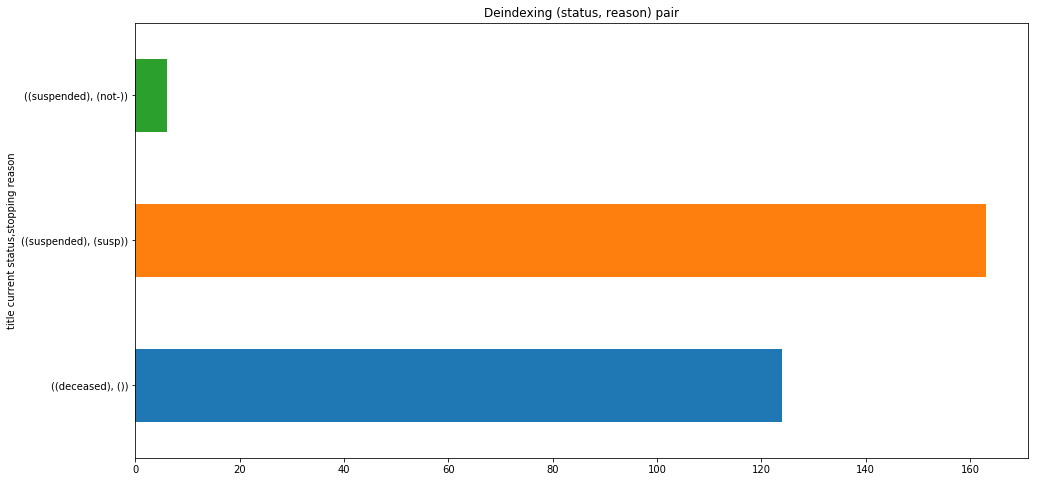

In [31]:
reasons.loc[False].plot.barh(
    title="Deindexing (status, reason) pair",
    figsize=(16, 8)
);

## Collection-specific analysis

In the data de-duplication section,
we had already normalized the rows to ensure every entry has a distinct ISSN.
If we hadn't, now that would need to be done
in order to properly count the entries of each collection.

Yearly, how many journals had been indexed for each collection?
Let's see the cumulative number of journals
indexed until a certain year for every collection.

In [32]:
indexed_on = (
    dataset
    .groupby(["inclusion year at SciELO", "collection"])
    .size()
    .unstack()
    .fillna(0)
    .sort_index(axis=1)
    .sort_index()
)
indexed_on.cumsum()

collection,arg,bol,chl,col,cri,cub,ecu,esp,mex,per,prt,psi,rve,rvt,scl,spa,sss,sza,ury,ven
inclusion year at SciELO,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,13.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,20.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,5.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,25.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,6.0,0.0,0.0,0.0,5.0
2002,0.0,0.0,35.0,3.0,10.0,9.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,96.0,8.0,0.0,0.0,0.0,9.0
2003,3.0,0.0,39.0,3.0,10.0,10.0,0.0,13.0,1.0,0.0,3.0,1.0,1.0,0.0,115.0,8.0,0.0,0.0,0.0,17.0
2004,4.0,0.0,47.0,6.0,10.0,15.0,0.0,21.0,1.0,7.0,4.0,4.0,1.0,0.0,130.0,9.0,0.0,0.0,0.0,23.0
2005,17.0,0.0,56.0,7.0,10.0,17.0,0.0,25.0,6.0,8.0,8.0,26.0,1.0,0.0,147.0,12.0,4.0,0.0,0.0,26.0


The number of indexed by year, instead of the cumulative values,
can be seen in a heat map:

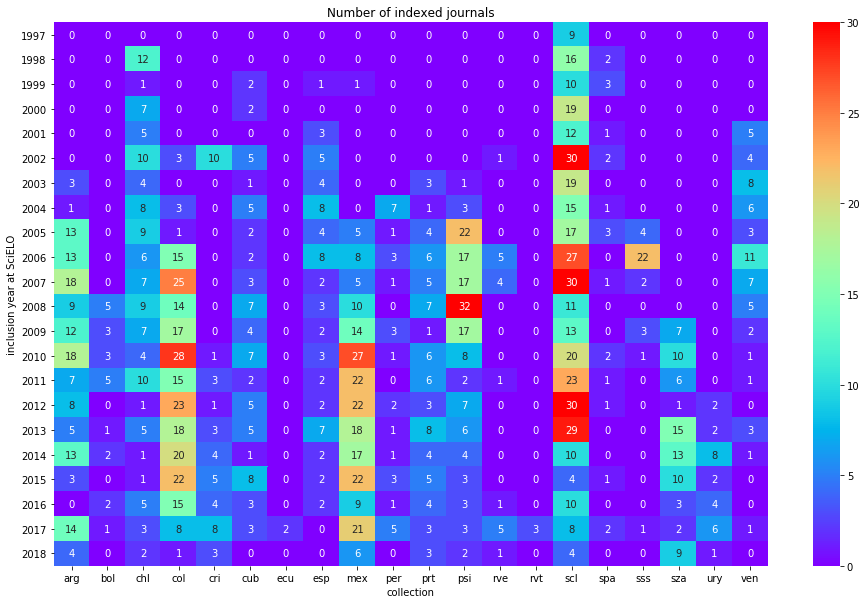

In [33]:
sns.heatmap(indexed_on,
    cmap="rainbow", fmt="g", annot=True,
    vmin=0, vmax=30,
    ax=plt.subplots(figsize=(16, 10))[1]
).set(title="Number of indexed journals");

And the same regarding the deindexed entries:

In [34]:
deindexed_on = (dataset
    .groupby(["stopping year at SciELO", "collection"])
    .size()
    .drop(np.inf)
    .unstack()
    .fillna(0)
    .sort_index(axis=1)
    .sort_index()
)
deindexed_on.cumsum()

collection,arg,bol,chl,col,cri,cub,esp,mex,prt,psi,rve,scl,spa,sss,sza,ury,ven
stopping year at SciELO,,,,,,,,,,,,,,,,,
1997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2001.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
2002.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
2003.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2004.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
2005.0,0.0,0.0,4.0,0.0,1.0,0.0,4.0,1.0,0.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0
2006.0,1.0,0.0,5.0,0.0,2.0,0.0,5.0,2.0,0.0,5.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0


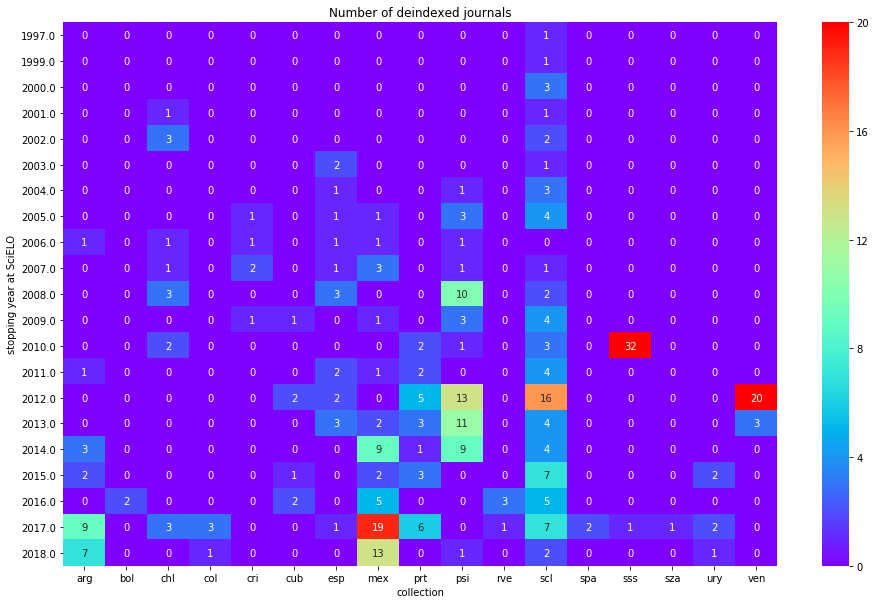

In [35]:
sns.heatmap(deindexed_on,
    cmap="rainbow", fmt="g", annot=True,
    vmin=0, vmax=20,
    ax=plt.subplots(figsize=(16, 10))[1]
).set(title="Number of deindexed journals");

We can join these in a single table
by stacking the collection as a secondary row index:

In [36]:
indexed_deindexed_df = pd.DataFrame([
    indexed_on.stack().rename("indexed"),
    deindexed_on.stack().rename("deindexed"),
]).T.fillna(0)
indexed_deindexed_df.iloc[::31]

,,indexed,deindexed
1997,arg,0.0,0.0
1998,psi,0.0,0.0
2000,chl,7.0,0.0
2001,rvt,0.0,0.0
2003,cri,0.0,0.0
2004,spa,1.0,0.0
2006,ecu,0.0,0.0
2007,sza,0.0,0.0
2009,mex,14.0,1.0
2010,ven,1.0,0.0


That makes it easier to plot both information at once for a single collection,
for example:

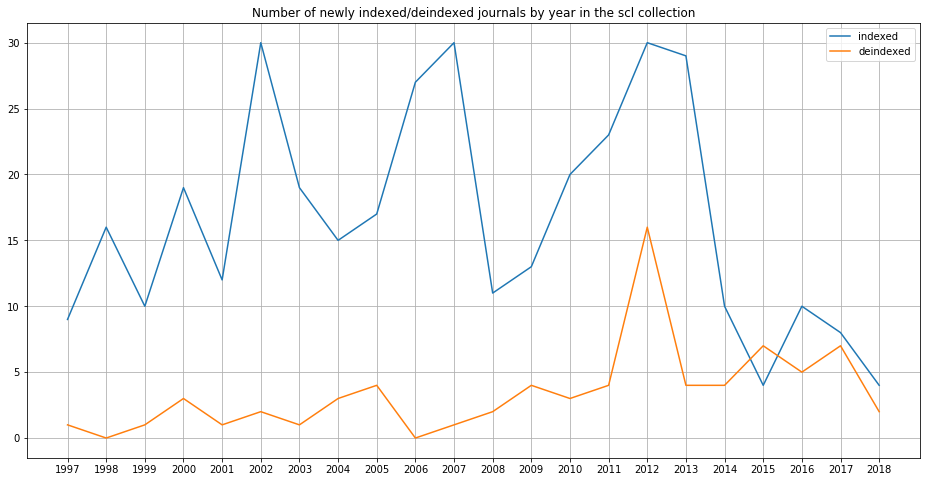

In [37]:
indexed_deindexed_df.reorder_levels([1, 0]).loc["scl"].plot(
    figsize=(16, 8),
    title="Number of newly indexed/deindexed journals "
          "by year in the scl collection",
    xticks=range(1997, 2019),
    grid=True,
);

We can get the active journals for all the collections
directly from the two dataframes
with the indexed and deindexed counts:

In [38]:
active_on = indexed_on.__sub__(deindexed_on, fill_value=0).cumsum()
active_on

collection,arg,bol,chl,col,cri,cub,ecu,esp,mex,per,prt,psi,rve,rvt,scl,spa,sss,sza,ury,ven
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,13.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0,5.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,20.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,5.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,24.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,5.0
2002,0.0,0.0,31.0,3.0,10.0,9.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,88.0,8.0,0.0,0.0,0.0,9.0
2003,3.0,0.0,35.0,3.0,10.0,10.0,0.0,11.0,1.0,0.0,3.0,1.0,1.0,0.0,106.0,8.0,0.0,0.0,0.0,17.0
2004,4.0,0.0,43.0,6.0,10.0,15.0,0.0,18.0,1.0,7.0,4.0,3.0,1.0,0.0,118.0,9.0,0.0,0.0,0.0,23.0
2005,17.0,0.0,52.0,7.0,9.0,17.0,0.0,21.0,5.0,8.0,8.0,22.0,1.0,0.0,131.0,12.0,4.0,0.0,0.0,26.0
2006,29.0,0.0,57.0,22.0,8.0,19.0,0.0,28.0,12.0,11.0,14.0,38.0,6.0,0.0,158.0,12.0,26.0,0.0,0.0,37.0


In [39]:
def add_markers_and_annotation(ax):
    # Apply the markers
    for line, marker in zip(ax.get_lines(), "ov^<>spP*hHxXDd8234+1.,"):
        line.set_marker(marker)
        col = line.get_label()
        x, y = line.get_data()
        x, y = x[:len(np.trim_zeros(y, "b"))], np.trim_zeros(y)
        x = x[-len(y):]
        line.set_data(x, y)
        ax.annotate(col, xy=(x[-1], y[-1]), xytext=(10,0),
                    textcoords="offset points")
    ax.legend()

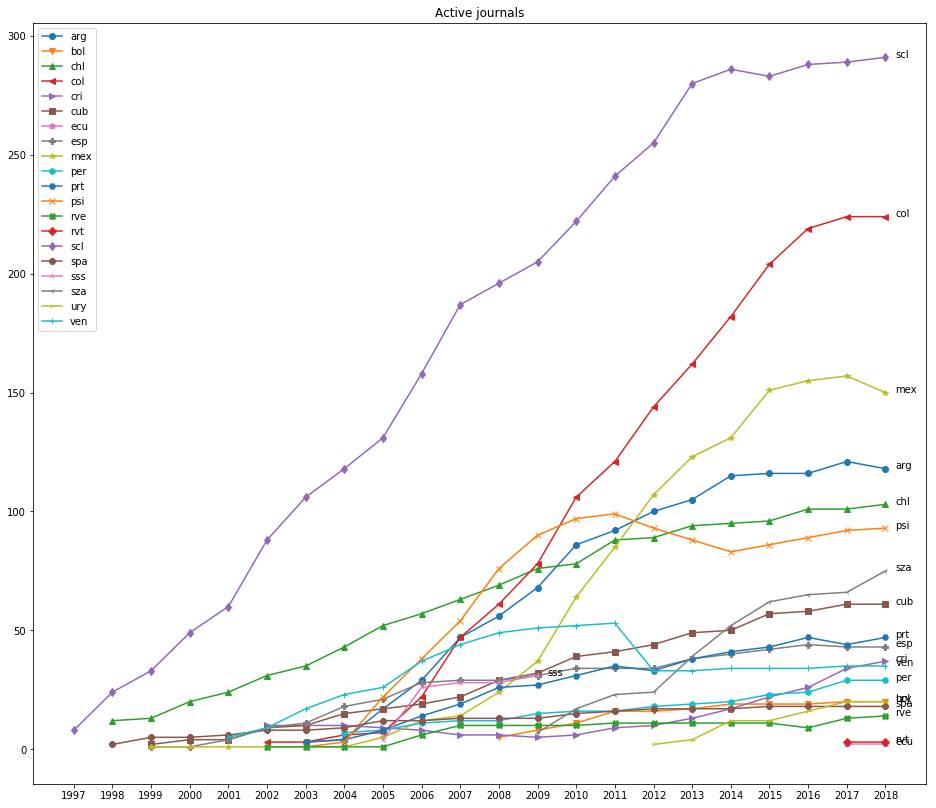

In [40]:
active_on.plot(figsize=(16, 14), xticks=active_on.index,
               title="Active journals")
add_markers_and_annotation(plt.gca())

The total number of active journals in 2018 for each collection is:

In [41]:
active_on.loc[2018].sort_values()

collection
sss      0.0
ecu      2.0
rvt      3.0
rve     14.0
spa     18.0
bol     20.0
ury     20.0
per     29.0
ven     35.0
cri     37.0
esp     43.0
prt     47.0
cub     61.0
sza     75.0
psi     93.0
chl    103.0
arg    118.0
mex    150.0
col    224.0
scl    291.0
Name: 2018, dtype: float64

Seeing just parts of the data:

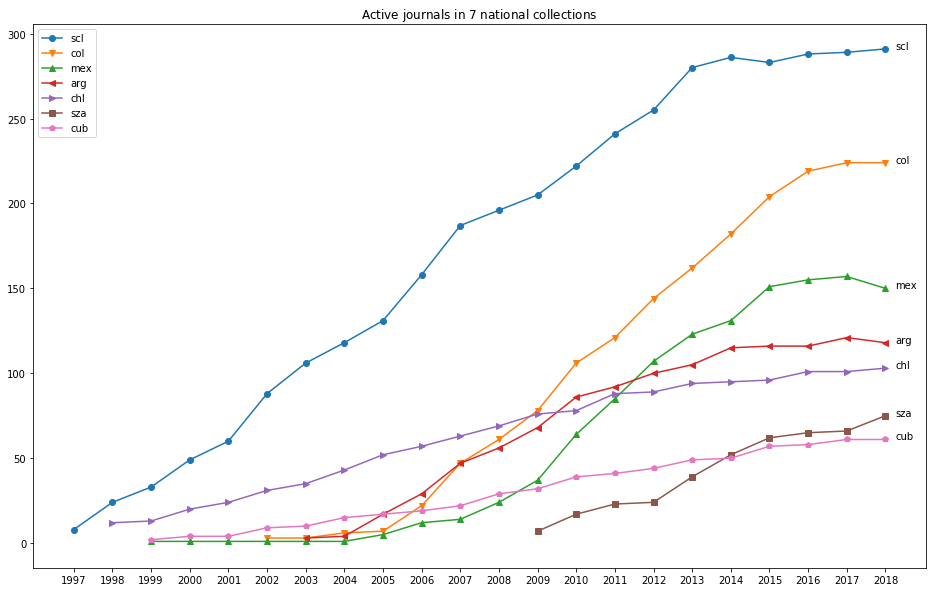

In [42]:
active_on[["scl", "col", "mex", "arg", "chl", "sza", "cub"]] \
         .plot.line(figsize=(16, 10), xticks=active_on.index,
                    title="Active journals in $7$ national collections")
add_markers_and_annotation(plt.gca())

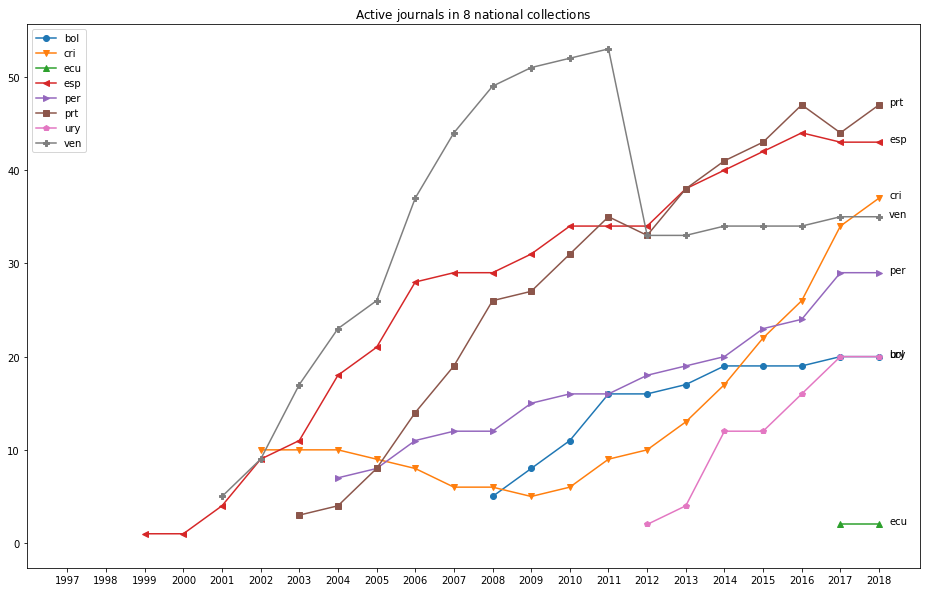

In [43]:
active_on.drop(columns=["scl", "col", "mex", "arg", "chl", "sza", "cub",
                        "psi", "rve", "rvt", "spa", "sss"]) \
         .plot.line(figsize=(16, 10), xticks=active_on.index,
                    title="Active journals in $8$ national collections")
add_markers_and_annotation(plt.gca())

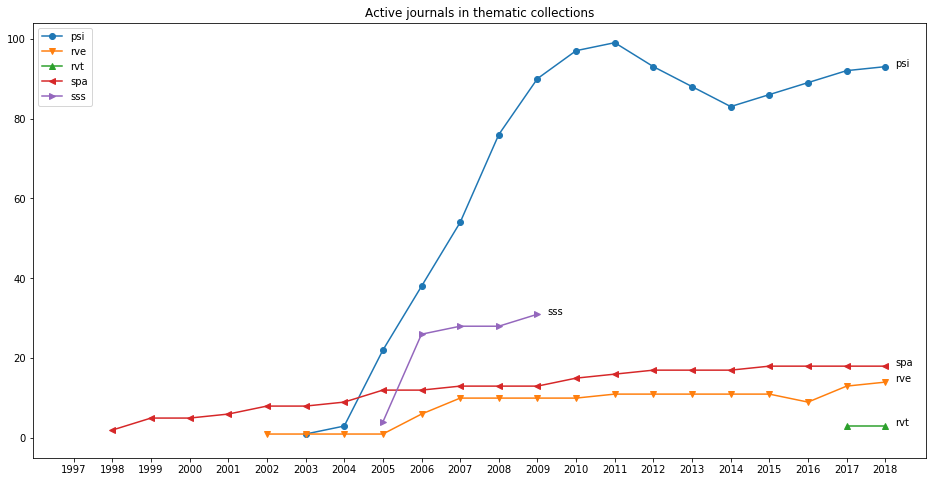

In [44]:
active_on[["psi", "rve", "rvt", "spa", "sss"]] \
         .plot.line(figsize=(16, 8), xticks=active_on.index,
                    title="Active journals in thematic collections")
add_markers_and_annotation(plt.gca())

Or, a subplots visualization of it all (without markers):

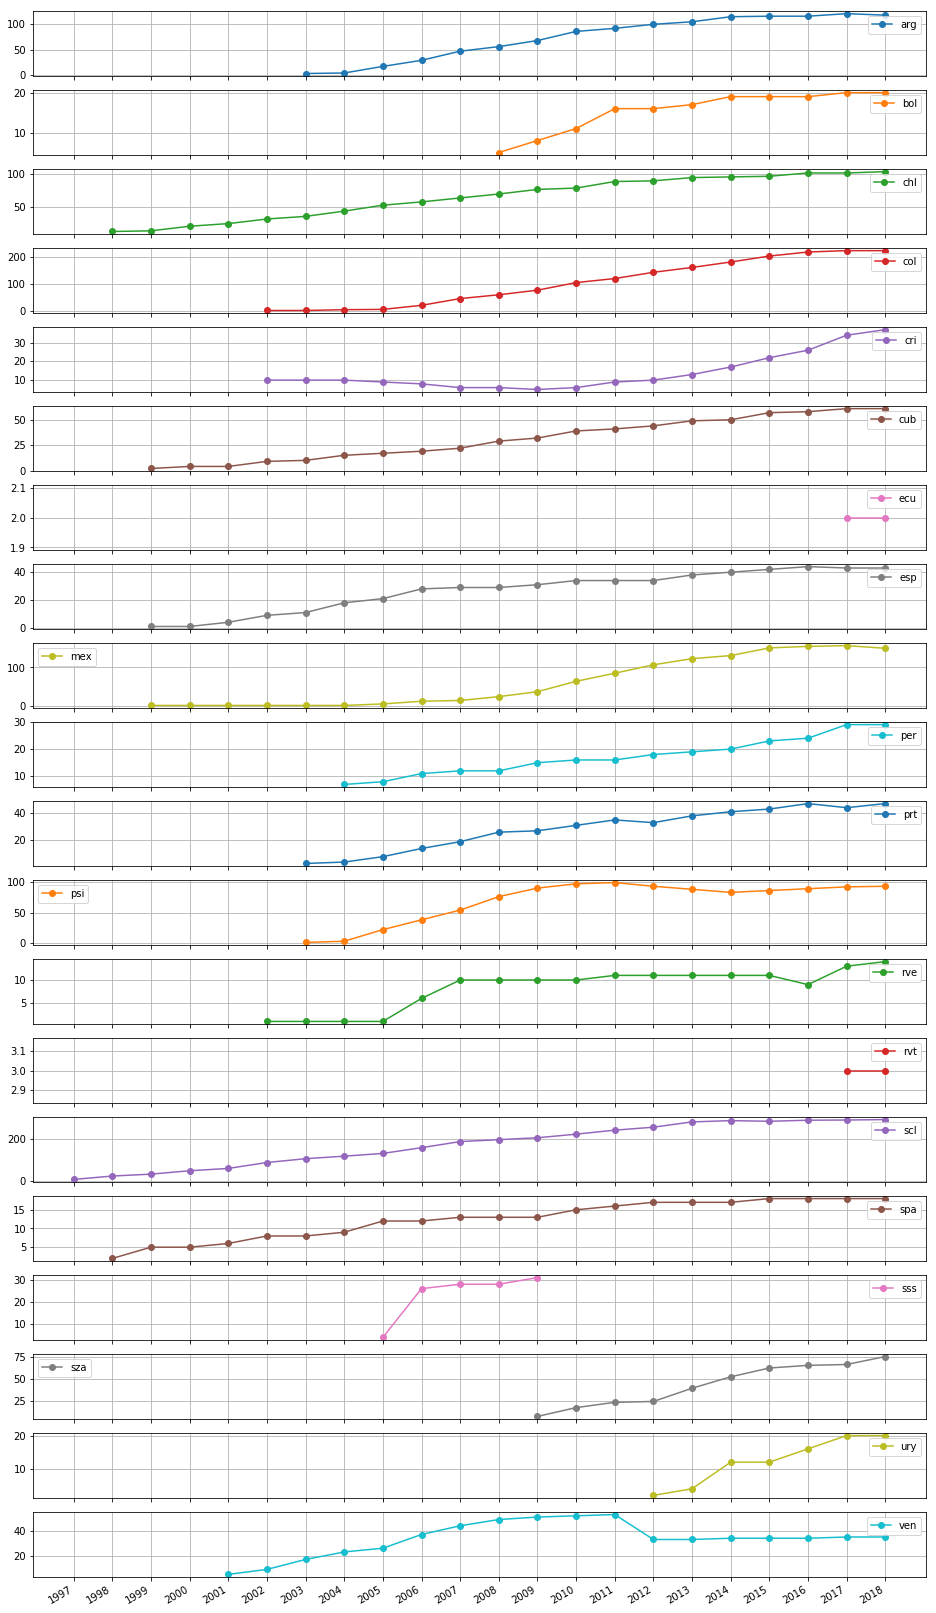

In [45]:
# Replacing 0 by NaN only works because these have no zero in-between
active_on.replace(0, np.nan).plot(
    subplots=True,
    figsize=(16, 32),
    xticks=active_on.index,
    grid=True,
    marker="o",
);

## Summing the collection-specific entries

Usually we shouldn't sum the count of the collection-specific entries,
because they have some intersection (the same ISSN)
and that would add some residual to our results.
To give some sense of how much residual is that,
let's calculate it!

In [46]:
collections_sum = active_on.T.sum()
collections_sum

1997       8.0
1998      38.0
1999      55.0
2000      80.0
2001     104.0
2002     169.0
2003     209.0
2004     262.0
2005     340.0
2006     477.0
2007     595.0
2008     689.0
2009     784.0
2010     884.0
2011     980.0
2012    1030.0
2013    1130.0
2014    1205.0
2015    1279.0
2016    1328.0
2017    1372.0
2018    1383.0
dtype: float64

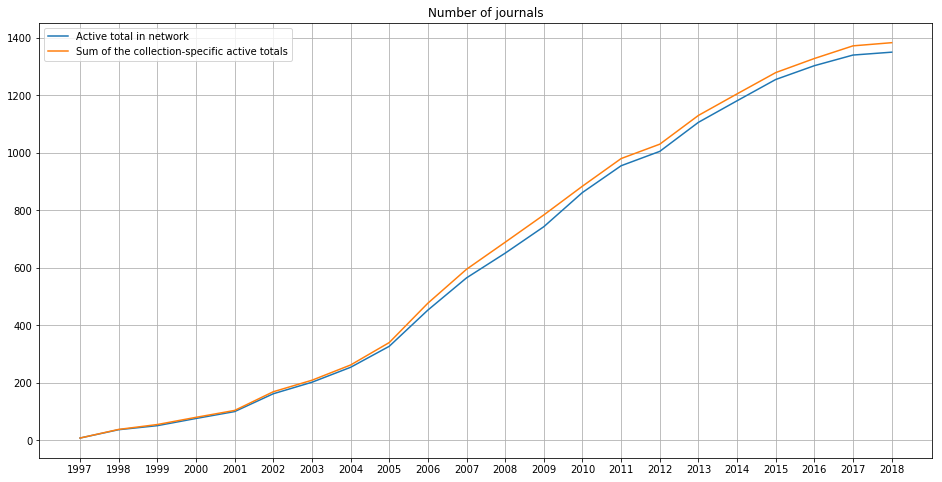

In [47]:
pd.DataFrame({
    "Active total in network": network_index["total"],
    "Sum of the collection-specific active totals": collections_sum,
}).plot(
    figsize=(16, 8),
    title="Number of journals",
    xticks=network_index.index,
    grid=True,
);

The shape is almost the same, but it's a $2.44\%$ error in $2018$
(using the 2018-09-14 data).

In [48]:
(collections_sum[2018] -
 network_index["total"][2018]) / network_index["total"][2018]

0.024444444444444446